* https://seaborn.pydata.org/tutorial.html
* http://seaborn.pydata.org/tutorial/relational.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Scatter & Rel

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

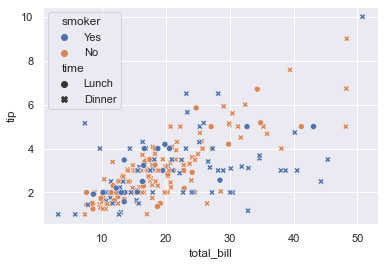

In [11]:
# scatterplot 수치데이터의 관계를 확인할때 사용
sns.scatterplot(data=tips, x="total_bill", y="tip",
               hue='smoker', style="time")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

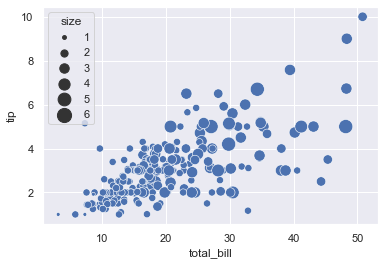

In [13]:
sns.scatterplot(data=tips, x="total_bill", y="tip",
            size="size", sizes=(15,200))

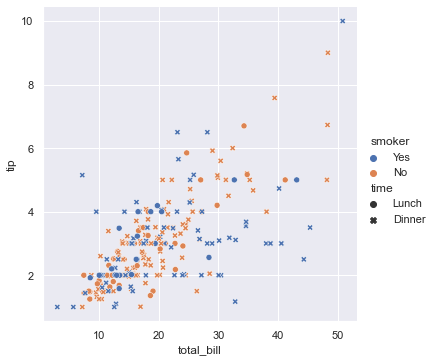

In [10]:
# 수치데이터의 관계를 확인할때 사용
# relplot을 사용하는 이유(col, row option이 존재하여 서브플롯을 사용할 수 있음)
# hue = 흡연여부에 따라 구분, style = 흡연 여부의 모양을 다르게 표시해줌 

sns.relplot(data=tips, x="total_bill", y="tip", 
            hue='smoker', style="time")

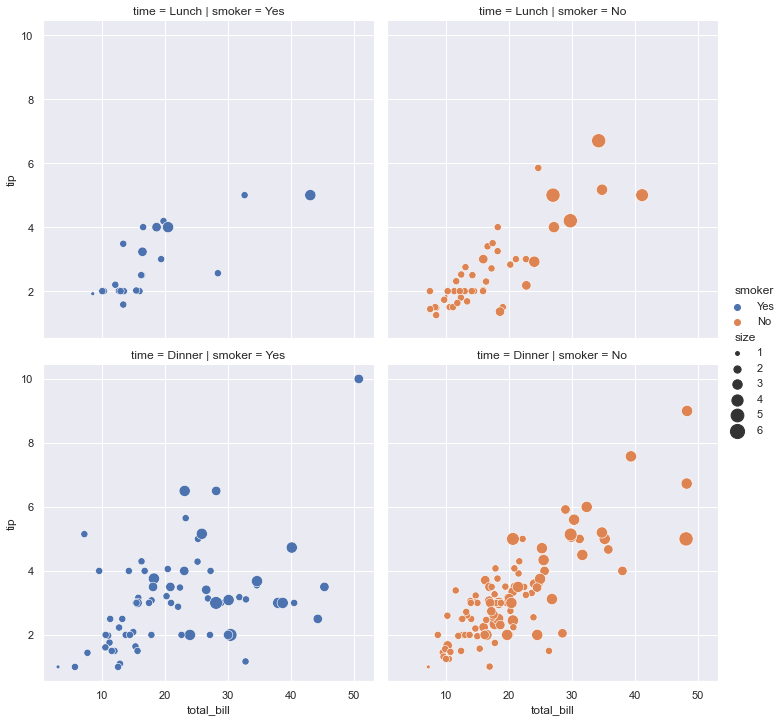

In [16]:
sns.relplot(data=tips, x="total_bill", y="tip",
            size="size", sizes=(15,200), hue="smoker",
            col="smoker", row="time")

# Line & Rel

In [19]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [20]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

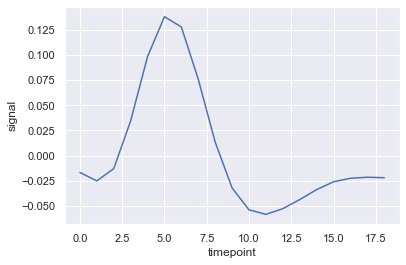

In [29]:
sns.lineplot(data=fmri, x="timepoint", y="signal", ci=None)

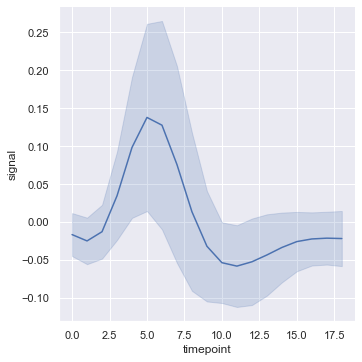

In [28]:
# ci= shdow "sd"=std

sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, ci="sd")

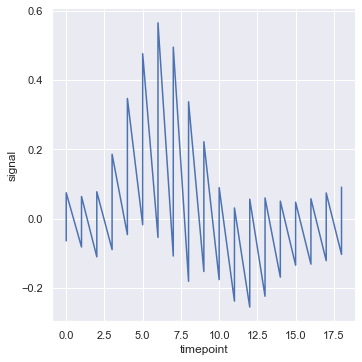

In [30]:
 sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, estimator=None)

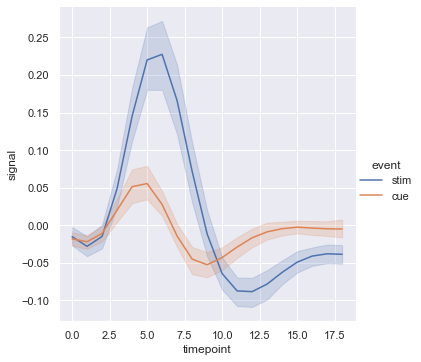

In [31]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, hue="event")

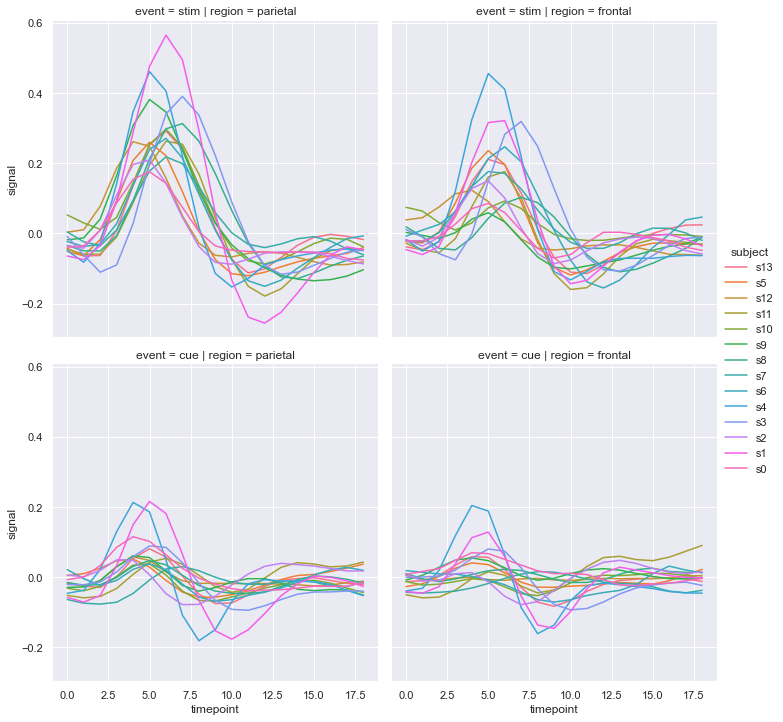

In [36]:
sns.relplot(data=fmri, x='timepoint', y="signal", kind="line",
           col="region", row="event", estimator=None, hue="subject")

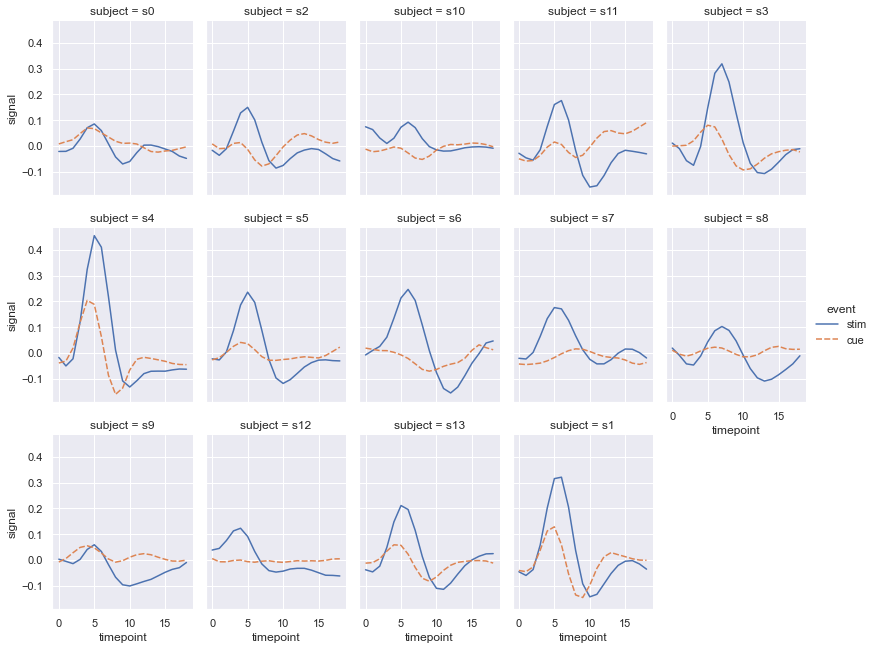

In [44]:
sns.relplot(data=fmri.query("region == 'frontal'"), x='timepoint', y="signal", kind="line",
           col="subject", col_wrap=5, height=3
            , aspect=.75 ,hue="event", style="event")